In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [9]:
NUM_WORDS = 10_000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

In [10]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
            results[i, word_indices] = 1.0 # Set Specific Indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension = NUM_WORDS)


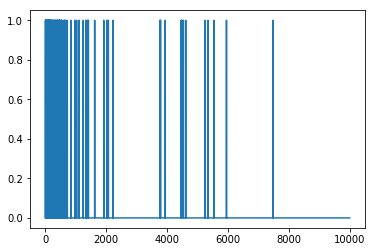

In [11]:
plt.plot(train_data[0])

In [12]:
# Creating a baseline model

baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape = (NUM_WORDS, )),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

baseline_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy']
                      )

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data, train_labels, 
                                     epochs = 20,
                                     batch_size = 512,
                                     validation_data = (test_data, test_labels),
                                     verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.4891 - acc: 0.8078 - binary_crossentropy: 0.4891 - val_loss: 0.3323 - val_acc: 0.8758 - val_binary_crossentropy: 0.3323
Epoch 2/20


KeyboardInterrupt: 

In [ ]:
# Smaller Model:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation = tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

smaller_model.compile(optimizer = 'adam', 
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

smaller_model.summary()


smaller_history = smaller_model.fit(train_data, 
                                   train_labels,
                                   epochs = 20,
                                   batch_size = 512,
                                   validation_data = (test_data, test_labels),
                                   verbose = 2)

In [ ]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation = tf.nn.relu, input_shape = (NUM_WORDS, )),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

bigger_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])
bigger_model.summary()

bigger_history = bigger_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, 
                                  validation_data = (test_data, test_labels),
                                  verbose = 2)

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize= (16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label = name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
                label = name.title() + ' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('basline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])
        
        

In [ ]:
# Regularized Params:

l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                      activation = tf.nn.relu, input_shape= (NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                      activation = tf.nn.relu),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])
    
l2_model.compile(optimizer = 'adam', loss='binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, 
                                validation_data = (test_data, test_labels),
                               verbose = 2)



In [ ]:
plot_history([('baseline', baseline_history), 
             ('L2', l2_model_history)])

In [ ]:
# Adding dropout

dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape = (NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

dpt_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs = 20, 
                                 batch_size = 512, validation_data = (test_data, test_labels),
                                 verbose = 2)